# Configuração Word2Vec

O word2vec (W2V) é um algoritmo que transforma palavras não estruturadas em vetores. Foi desenvolvido pela Google em 2013 e é amplamente utilizado para projetos de processamento de linguagem natural (PLN). 

O algoritmo opera de uma maneira relativamente simples: ele mapeia palavras para vetores densos de números reais, de forma que palavras semanticamente semelhantes são mapeadas para vetores próximos no espaço vetorial. Por exemplo, palavras que frequentemente aparecem juntas em contextos semelhantes (como "rei" e "rainha", ou "gato" e "rato") tendem a ter representações vetoriais próximas.

Existem duas arquiteturas principais para o Word2Vec: Skip-gram e CBOW (Continuous Bag of Words). No Skip-gram, o modelo tenta prever as palavras vizinhas dado uma palavra de entrada, enquanto no CBOW, o modelo tenta prever a palavra de entrada dado um conjunto de palavras vizinhas. Essas abordagens são treinadas em grandes conjuntos de dados de texto, como corpora de documentos, para aprender associações semânticas entre palavras.

Essas apresentações vetoriais aprendidas pelo W2V são utilizadas em uma variedade de coisas em PLN, como para análise de sentimentos, tradução automática, agrupamento de documentos e etc.

## Baixar os pacotes

In [1]:
%pip install scipy==1.12
%pip install gensim
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importando os vetores pré-treinados

O conjunto de vetores pré-treinados escolhido é o do Google News, o qual foi treinado em mais 100 bilhões de palavras de notícias diversas e contém 300 dimensões ([**Google**](https://code.google.com/archive/p/word2vec/)). Sua escolha foi baseada em diversos fatores, entre eles a sua eficiência, eficácia e nos resultados já demonstrados em outras aplicações que utilizam dela, como demonstrado na [documentação](../documentacao/documentacao.md#c7).

In [2]:
from gensim import models

w = models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin.gz', binary=True)

## Treino do Modelo W2V

Antes de criar a função de vetorização usando o pacote da Google, optamos por testar o Word2Vec na base a própria Uber. Com isso, podemos então comparar com mais propriedade os resultados no futuro.

Abaixo será possível acompanhar os passos desse processo:

### 1. Bibliotecas Necessárias

In [3]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

### 2. Importação do arquivo pré-processado

In [4]:
file_path = r'..\data\processed_classification-labeled.csv'
df = pd.read_csv(file_path)

### 3. Treino do Modelo

In [5]:
corpus = df['pos_tokens']

corpus_tokenizado = [simple_preprocess(doc) for doc in corpus]

""" Entendemos que o melhor algoritmo de W2V para ser usado é o CBOW.
    CBOW (Continuous Bag of Words): 
    Prediz uma palavra baseado no contexto (as palavras ao redor)."""

model = Word2Vec(
    sentences=corpus_tokenizado,
    vector_size=100,  # Tamanho dos vetores de palavras
    window=5,         # Tamanho da janela de contexto
    min_count=2,      # Frequência mínima das palavras
    sg=0,             # Usando CBOW
    epochs=10         # Número de épocas
)

# Salvando o modelo treinado
model.save("word2vec_cbow.model")

# Carregar o modelo treinado
model = Word2Vec.load("word2vec_cbow.model")

### 4. Testes

#### 1. Teste `corpus_tokenizado`

In [6]:
def test_tokenize_corpus():
    """
    Tests the tokenization of the corpus using Gensim's simple_preprocess.
    This function attempts to tokenize the corpus present in a DataFrame column named 'pos_tokens'.
    It asserts that the tokenized corpus should not be empty and should contain lists of tokens.

    Pre-condition:
    - A DataFrame 'df' with a column 'pos_tokens' containing text data must exist.

    Process:
    - The function tokenizes each document in the 'pos_tokens' column using simple_preprocess.
    - The result is a list of tokenized documents.

    Post-condition:
    - The function asserts that the resulting tokenized corpus is not empty.
    - The function asserts that each element in the tokenized corpus is a list.
    """
    try:
        corpus = df['pos_tokens']
        corpus_tokenizado = [simple_preprocess(doc) for doc in corpus]
        assert corpus_tokenizado, "Tokenized corpus is empty"
        assert all(isinstance(doc, list) for doc in corpus_tokenizado), "Not all elements in tokenized corpus are lists"
    except Exception as e:
        print(f"Failed to tokenize corpus: {e}")

test_tokenize_corpus()


#### 2. Teste `model Word2vec`

In [7]:
def test_train_word2vec():
    """
    Tests the training of a Word2Vec model using the CBOW algorithm.
    This function attempts to train a Word2Vec model on a tokenized corpus.

    Pre-condition:
    - A tokenized corpus 'corpus_tokenizado' must exist, containing lists of tokens.

    Process:
    - The function trains a Word2Vec model with specified parameters: vector_size, window, min_count, sg, and epochs.
    - The model is trained using the CBOW algorithm.

    Post-condition:
    - The function asserts that the model is trained and has the expected vocabulary size.
    """
    try:
        model = Word2Vec(
            sentences=corpus_tokenizado,
            vector_size=100,  # Size of word vectors
            window=5,         # Context window size
            min_count=2,      # Minimum word frequency
            sg=0,             # Using CBOW
            epochs=10         # Number of epochs
        )
        assert len(model.wv) > 0, "Trained model has an empty vocabulary"
    except Exception as e:
        print(f"Failed to train Word2Vec model: {e}")

test_train_word2vec()


#### 3. Teste de similaridade

In [8]:
# verificando se 'driver' está no vocabulário
if 'driver' in model.wv.key_to_index:
    # encontrar palavras mais similares a uma palavra alvo
    similar_words = model.wv.most_similar("driver", topn=5)
    print(similar_words)
    
    # obter o vetor de uma palavra específica
    vector = model.wv["driver"]
    print(vector)
else:
    print("A palavra 'driver' NÃO está no vocabulário.")

[('one', 0.9909066557884216), ('available', 0.9906733632087708), ('pay', 0.9906351566314697), ('tip', 0.9906001687049866), ('come', 0.9902719259262085)]
[-1.35971725e-01  4.73747700e-02  1.77805051e-01 -1.80706710e-01
 -6.65252432e-02 -9.73178387e-01 -8.39248747e-02  1.01851463e+00
 -2.33082175e-01 -5.49069524e-01 -6.50633126e-02 -5.98060369e-01
 -2.89221615e-01  2.45249048e-01  2.86500096e-01 -4.48521078e-01
 -1.85291633e-01 -7.42488801e-01 -4.62464914e-02 -4.36211735e-01
  2.66657680e-01  4.47795302e-01  1.63768098e-01 -2.48911336e-01
 -1.23189725e-01  1.08665064e-01 -3.25970888e-01 -4.10527140e-01
 -4.66065228e-01 -4.82829101e-02  2.16164008e-01  7.13792583e-03
  1.61304608e-01 -1.32881388e-01 -8.86083618e-02  5.84382296e-01
  7.34764487e-02 -4.90684211e-01 -3.85723919e-01 -7.43530273e-01
  2.45369534e-04 -6.94369599e-02 -3.68571132e-01  5.40728904e-02
  3.00519049e-01 -3.36507231e-01 -3.40843797e-01  7.85765871e-02
  2.28393868e-01  1.26919463e-01  1.13473192e-01 -3.11528236e-01
 -

#### 4. Teste de predição do CBOW

In [9]:
""" Teste para saber se o modelo está sendo capaz 
    de predizer a palavra, dado o contexto"""

context = ["I", "want", "home"]

# previsão
predicted = model.predict_output_word(context)

""" O resultado será uma lista de tuplas, 
    onde cada tupla contém uma palavra predita e sua probabilidade."""

print("Palavras preditas e suas probabilidades em ordem:", predicted)

Palavras preditas e suas probabilidades em ordem: [('way', 0.001804931), ('call', 0.0017530274), ('car', 0.0016742232), ('now', 0.001640334), ('it', 0.0016254184), ('pay', 0.0016150028), ('then', 0.001585127), ('think', 0.0015419719), ('back', 0.0015388167), ('the', 0.0015080295)]


## Vetorização de frases

Já que temos o W2V treinado com a base da Uber, e entendemos como ele funciona, é hora de usar a base tokenizada para vetorizar as frases contidas nela.

Abaixo está o código responsável por isso:

In [10]:
import numpy as np

# Definição da função de vetorização de frases
def funcao_vetorizer(df, w):
    frases_vetorizadas = []
    
    for index, row in df.iterrows():
        # Selecionando a coluna que contém os tokens
        tokens = simple_preprocess(row['pos_tokens']) 
        
        # Vetor para somar os vetores dos tokens buscando no pacote da Google
        frase_vetor = np.zeros(w.vector_size)
        
        for token in tokens:
            if token in w.key_to_index:
                frase_vetor += w[token]
        
        frases_vetorizadas.append(frase_vetor)
    
    # Novo DataFrame com os vetores das frases
    df_vetorizado = pd.DataFrame(frases_vetorizadas)
    return df_vetorizado

df_vetorizado = funcao_vetorizer(df, w)
print(df_vetorizado)

           0         1         2         3         4         5         6    \
0     0.815247  0.090027 -0.342529  0.094971 -0.565308 -0.078125 -0.333496   
1     0.627197  0.233765 -0.342224  1.340637 -0.855957  0.229004  0.046013   
2     0.565430  0.291138 -0.535950 -0.406414 -1.902283  0.656433  0.398407   
3     1.040100 -1.125763 -1.143188  1.014160 -0.667145  0.807129  0.133575   
4     0.073730  0.339935  0.343445  0.343262  0.009766 -0.035339  0.590302   
...        ...       ...       ...       ...       ...       ...       ...   
2871  0.408691  0.045044 -0.917480 -0.306641 -1.723389  0.069580  0.074921   
2872  0.408691  0.045044 -0.917480 -0.306641 -1.723389  0.069580  0.074921   
2873  0.408691  0.045044 -0.917480 -0.306641 -1.723389  0.069580  0.074921   
2874 -0.137939 -0.572647 -0.681519  1.087158 -0.981079  0.837708 -0.307526   
2875  0.805542  0.365667 -0.325790  0.834991 -2.210205 -0.818665  0.278656   

           7         8         9    ...       290       291    

### Teste `funcao_vetorizer`

In [11]:
def test_funcao_vetorizer():
    """
    Tests the vectorization of sentences using a pre-trained Word2Vec model.
    This function attempts to vectorize each sentence in a DataFrame column named 'pos_tokens'
    by summing the word vectors of its tokens.

    Pre-condition:
    - A DataFrame 'df' with a column 'pos_tokens' containing tokenized text data must exist.
    - A pre-trained Word2Vec model 'w' must be available.

    Process:
    - The function iterates over each row in the DataFrame.
    - Each sentence is tokenized using simple_preprocess.
    - A zero vector is initialized for each sentence.
    - For each token in the sentence, if the token is in the Word2Vec vocabulary, its vector is added to the sentence vector.
    - The resulting sentence vectors are appended to a list.
    - A new DataFrame is created from the list of sentence vectors.

    Post-condition:
    - The function returns a DataFrame where each row corresponds to the vector representation of a sentence.
    - The resulting DataFrame should have the same number of rows as the input DataFrame.

    """
    try:
        frases_vetorizadas = []

        for index, row in df.iterrows():
            tokens = simple_preprocess(row['pos_tokens'])
            
            # vetor para somar os vetores dos tokens
            frase_vetor = np.zeros(w.vector_size)
            
            for token in tokens:
                if token in w.key_to_index:
                    frase_vetor += w[token]
            
            frases_vetorizadas.append(frase_vetor)
        
        # novo DataFrame com os vetores das frases
        df_vetorizado = pd.DataFrame(frases_vetorizadas)
        assert df_vetorizado.shape[0] == df.shape[0], "The number of rows in the resulting DataFrame does not match the input DataFrame"
        return df_vetorizado
    except Exception as e:
        print(f"Failed to vectorize sentences: {e}")

df_vetorizado = test_funcao_vetorizer()
print(df_vetorizado)


           0         1         2         3         4         5         6    \
0     0.815247  0.090027 -0.342529  0.094971 -0.565308 -0.078125 -0.333496   
1     0.627197  0.233765 -0.342224  1.340637 -0.855957  0.229004  0.046013   
2     0.565430  0.291138 -0.535950 -0.406414 -1.902283  0.656433  0.398407   
3     1.040100 -1.125763 -1.143188  1.014160 -0.667145  0.807129  0.133575   
4     0.073730  0.339935  0.343445  0.343262  0.009766 -0.035339  0.590302   
...        ...       ...       ...       ...       ...       ...       ...   
2871  0.408691  0.045044 -0.917480 -0.306641 -1.723389  0.069580  0.074921   
2872  0.408691  0.045044 -0.917480 -0.306641 -1.723389  0.069580  0.074921   
2873  0.408691  0.045044 -0.917480 -0.306641 -1.723389  0.069580  0.074921   
2874 -0.137939 -0.572647 -0.681519  1.087158 -0.981079  0.837708 -0.307526   
2875  0.805542  0.365667 -0.325790  0.834991 -2.210205 -0.818665  0.278656   

           7         8         9    ...       290       291    

## CSV de treino

In [12]:
df_vetorizado['id'] = range(1, len(df_vetorizado) + 1)
df_vetorizado.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,id
0,0.815247,0.090027,-0.342529,0.094971,-0.565308,-0.078125,-0.333496,-0.728516,1.064941,0.505585,...,0.674805,-0.802170,-0.112305,0.132858,-0.790649,0.098019,-0.167297,0.095715,0.194824,1
1,0.627197,0.233765,-0.342224,1.340637,-0.855957,0.229004,0.046013,-1.451172,1.153381,0.161865,...,0.145264,-0.882812,-0.262573,-0.367096,-0.846436,0.713928,-0.643921,0.146118,0.221313,2
2,0.565430,0.291138,-0.535950,-0.406414,-1.902283,0.656433,0.398407,-0.588501,1.790436,0.681396,...,-0.199890,-1.796811,0.939209,-1.567017,-1.668457,-0.836792,-1.259201,0.390259,0.334229,3
3,1.040100,-1.125763,-1.143188,1.014160,-0.667145,0.807129,0.133575,-1.746475,0.388916,1.133301,...,0.972900,-1.734924,0.494019,-0.931152,-0.594589,0.465759,-1.083252,-0.322388,-0.897339,4
4,0.073730,0.339935,0.343445,0.343262,0.009766,-0.035339,0.590302,-0.095215,0.075775,0.955566,...,1.128418,-0.343506,0.064941,0.567139,0.268799,-0.145569,-0.313721,0.195297,-0.458984,5


In [13]:
df = df[['id', 'sentiment']]
df.head()

,id,sentiment
0,1,0
1,2,0
2,3,-1
3,4,0
4,5,-1


In [14]:
df_final = pd.merge(df_vetorizado, df, on='id', how='left')
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,id,sentiment
0,0.815247,0.090027,-0.342529,0.094971,-0.565308,-0.078125,-0.333496,-0.728516,1.064941,0.505585,...,-0.802170,-0.112305,0.132858,-0.790649,0.098019,-0.167297,0.095715,0.194824,1,0.0
1,0.627197,0.233765,-0.342224,1.340637,-0.855957,0.229004,0.046013,-1.451172,1.153381,0.161865,...,-0.882812,-0.262573,-0.367096,-0.846436,0.713928,-0.643921,0.146118,0.221313,2,0.0
2,0.565430,0.291138,-0.535950,-0.406414,-1.902283,0.656433,0.398407,-0.588501,1.790436,0.681396,...,-1.796811,0.939209,-1.567017,-1.668457,-0.836792,-1.259201,0.390259,0.334229,3,-1.0
3,1.040100,-1.125763,-1.143188,1.014160,-0.667145,0.807129,0.133575,-1.746475,0.388916,1.133301,...,-1.734924,0.494019,-0.931152,-0.594589,0.465759,-1.083252,-0.322388,-0.897339,4,0.0
4,0.073730,0.339935,0.343445,0.343262,0.009766,-0.035339,0.590302,-0.095215,0.075775,0.955566,...,-0.343506,0.064941,0.567139,0.268799,-0.145569,-0.313721,0.195297,-0.458984,5,-1.0


In [15]:
df_final.to_csv('df_semifinal.csv', index=False)

**1. Leitura dos Dados:**
- O arquivo CSV original (`df_semifinal.csv`) foi carregado em um DataFrame utilizando a função `read_csv` da biblioteca Pandas.

**2. Processamento dos Dados:**
- Remoção da coluna `'id'` resultando em um conjunto de dados mais limpo e focado para o treinamento com alguns modelos de ML.

**3. Geração do CSV Final:**
- Processamento de um novo CSV chamado `df_semifinal.csv` utilizando a função `to_csv`, configurada para não incluir o índice do df no arquivo final.

In [20]:
file_path3 = r'C:\Users\Inteli\Documents\GitHub\2024-1B-T10-SI06-G04\src\df_semifinal.csv'
df_3 = pd.read_csv(file_path3)
df_3.head()

#colunas_para_remover = ['id']
#df_final = df_3.drop(columns=colunas_para_remover)
#df_final.head()
#df_final.to_csv('df_final.csv', index=False)
#df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,id,sentiment
0,0.815247,0.090027,-0.342529,0.094971,-0.565308,-0.078125,-0.333496,-0.728516,1.064941,0.505585,...,-0.802170,-0.112305,0.132858,-0.790649,0.098019,-0.167297,0.095715,0.194824,1,0.0
1,0.627197,0.233765,-0.342224,1.340637,-0.855957,0.229004,0.046013,-1.451172,1.153381,0.161865,...,-0.882812,-0.262573,-0.367096,-0.846436,0.713928,-0.643921,0.146118,0.221313,2,0.0
2,0.565430,0.291138,-0.535950,-0.406414,-1.902283,0.656433,0.398407,-0.588501,1.790436,0.681396,...,-1.796811,0.939209,-1.567017,-1.668457,-0.836792,-1.259201,0.390259,0.334229,3,-1.0
3,1.040100,-1.125763,-1.143188,1.014160,-0.667145,0.807129,0.133575,-1.746475,0.388916,1.133301,...,-1.734924,0.494019,-0.931152,-0.594589,0.465759,-1.083252,-0.322388,-0.897339,4,0.0
4,0.073730,0.339935,0.343445,0.343262,0.009766,-0.035339,0.590302,-0.095215,0.075775,0.955566,...,-0.343506,0.064941,0.567139,0.268799,-0.145569,-0.313721,0.195297,-0.458984,5,-1.0


## Random Forest

Melhores hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy: 0.98
              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98       376
         0.0       0.98      0.96      0.97       344
         1.0       0.99      0.99      0.99       348

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



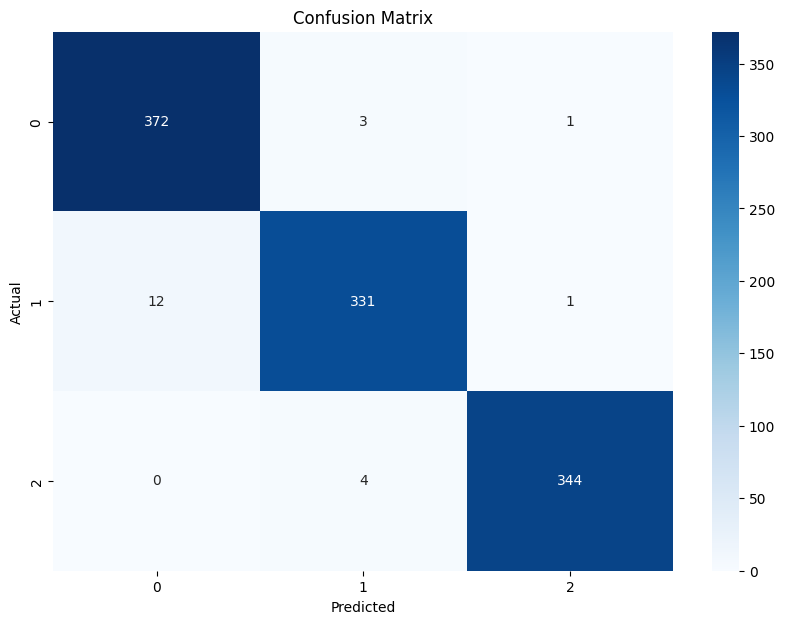

Cross-validation scores: [0.91479401 0.96535581 0.99157303 0.98501873 0.93539326]
Mean cross-validation score: 0.96


In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Caminho relativo para o arquivo CSV a partir do diretório atual de trabalho
file_path = os.path.join('data', 'df_semifinal.csv')

# Verificar se o arquivo existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"O arquivo {file_path} não foi encontrado. Verifique o caminho e tente novamente.")

# Carregar os dados de treinamento
df = pd.read_csv(file_path)

# Verificar se há valores NaN na coluna 'sentiment' e remover ou preencher
if df['sentiment'].isnull().sum() > 0:
    df = df.dropna(subset=['sentiment'])

# Separar os dados e os rótulos
X = df.iloc[:, 3:303].values  # Colunas de características de '3' a '302'
y = df['sentiment'].values  # Coluna de rótulo

# Balancear as classes usando SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Definir a distribuição de parâmetros para o Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar o Randomized Search com validação cruzada
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Melhores hiperparâmetros: {best_params}")

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Utilizar validação cruzada
cv_scores = cross_val_score(best_model, X_res, y_res, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

As métricas utilizadas para a escolha do modelo foram o precision (precisão), recall (revocação) e f1-score (que é a média das outras duas métricas). Suas escolhas foram feitas baseadas na necessidade do cliente em reconhecer todos os casos negativos mesmo que isso gere falsos negativos. Para mais detalhes a sessão [6.4](#c6.4) apresenta a escolha de métricas mais detalhadamente.

O modelo com o Random Forest demonstra consistência na classificação de cada classe individualmente. Para a classe -1, o modelo apresenta alta precisão (0.97), indicando que a maioria das amostras são classificadas corretamente, e um recall muito alto (0.99), sugerindo que quase todas as amostras desta classe são identificadas corretamente. Para a classe 0, a precisão também é elevada (0.98), com um recall ligeiramente inferior (0.96), o que indica uma excelente capacidade de identificar a maioria das amostras verdadeiras, embora alguns falsos positivos possam ocorrer. Para a classe 1, tanto a precisão (0.99) quanto o recall (0.99) são muito altos, sugerindo uma forte capacidade do modelo em classificar corretamente a maioria das amostras desta classe.

Métricas de Desempenho
Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}

Acurácia: 0.98

A precisão, o recall e o F1-score para todas as classes são muito altos, indicando um desempenho excelente do modelo em classificar corretamente a maioria das amostras no conjunto de dados.

## Naive Bayes

Melhores hiperparâmetros: {'alpha': 0.001}
Accuracy: 0.88
              precision    recall  f1-score   support

        -1.0       1.00      0.95      0.97       376
         0.0       0.79      0.83      0.81       344
         1.0       0.83      0.84      0.84       348

    accuracy                           0.88      1068
   macro avg       0.88      0.87      0.87      1068
weighted avg       0.88      0.88      0.88      1068



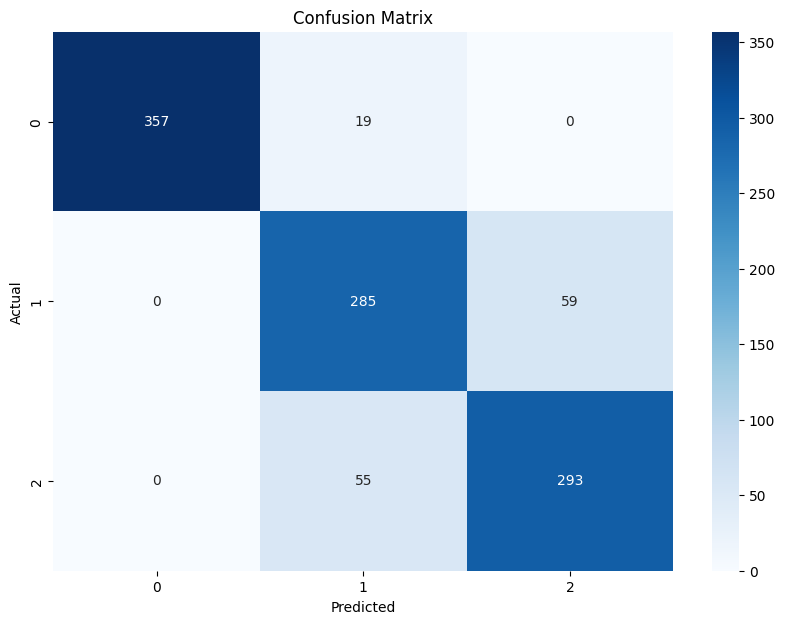

In [38]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = os.path.join('data', 'df_semifinal.csv')

# Carregar os dados de treinamento
df = pd.read_csv(file_path)

# Verificar se há valores NaN na coluna 'sentiment' e remover ou preencher
if df['sentiment'].isnull().sum() > 0:
    df = df.dropna(subset=['sentiment'])

# Separar os dados e os rótulos
X = df.iloc[:, 3:303].values  
y = df['sentiment'].values  

# Balancear as classes usando SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Normalizar os dados para valores entre 0 e 1
scaler = MinMaxScaler()
X_res = scaler.fit_transform(X_res)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Definir a grade de parâmetros para o Grid Search
param_grid = {
    'alpha': np.logspace(-3, 2, 6)
}

# Criar o modelo Multinomial Naive Bayes
mnb_model = MultinomialNB()

# Configurar o Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=mnb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Melhores hiperparâmetros: {best_params}")

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Por outro lado, o modelo Naive Bayes apresenta algumas inconsistências na classificação de cada classe individualmente. Para a classe -1, a precisão é excelente (1.00), mas o recall é ligeiramente mais baixo (0.95), indicando que a maioria das amostras são classificadas corretamente, embora algumas ainda possam ser perdidas. Na classe 0, a precisão é boa (0.79), mas menor do que na classe -1, sugerindo a presença de falsos positivos, enquanto o recall (0.83) mostra que a maioria das amostras verdadeiras são identificadas, com algumas sendo perdidas. Para a classe 1, tanto a precisão (0.83) quanto o recall (0.84) são altos, indicando uma boa capacidade do modelo em classificar corretamente a maioria das amostras desta classe, embora ainda haja espaço para melhorias.

Melhores Hiperparâmetros**: {'alpha': 0.001}

Acurácia: 0.88

No geral, a precisão, o recall e o F1-score para todas as classes são bons, com uma acurácia geral de 0.88, indicando um desempenho sólido do modelo, embora haja áreas que poderiam ser aprimoradas para melhorar a identificação correta de todas as classes.

## Comparação dos modelos com Word2Vec

Ao comparar os dois modelos, é evidente que o modelo baseado em Random Forest supera significativamente o modelo de Naive Bayes em termos de desempenho geral. O Random Forest alcançou uma acurácia de 0.98, com precisão, recall e F1-score altos para todas as classes. Em contraste, o Naive Bayes obteve uma acurácia de 0.88, com métricas de precisão e recall inferiores, especialmente para as classes 0 e 1.

Os melhores hiperparâmetros também diferem entre os modelos, indicando que abordagens de modelagem distintas foram mais eficazes para cada um. Embora o Random Forest mostre um desempenho superior, é essencial realizar uma avaliação mais aprofundada para descartar overfitting ou vazamento de dados.

Em conclusão, o Random Forest parece ser o modelo mais adequado para este problema, mas uma análise criteriosa e a testagem de mais modelos são recomendadas antes de uma decisão final.